In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
from timeit import default_timer as timer
# set the option to display the full string from a pandas DataFrame
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

import seaborn as sns
sns.set(style="darkgrid")

## Gathering Data

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [42]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


I Uploaded the tweet_json.txt from Udacity material instead of downloading it using above provided code

In [4]:
tweet_json = pd.read_json('tweet_json.txt', lines = True)
tweet_json.rename(columns={'id': 'tweet_id'}, inplace=True)
tweet_json = tweet_json.loc[:, ['tweet_id','retweet_count', 'favorite_count']]

## Assessing Data

#### Visual assessment

In [79]:
tweet_json.sample(10)

,tweet_id,retweet_count,favorite_count
1023,746369468511756288,1854,6637
1722,680085611152338944,10034,13959
1670,682389078323662849,518,1828
1102,735137028879360001,1092,3428
870,761371037149827077,20500,0
2094,670755717859713024,123,475
1297,707738799544082433,2785,4495
259,842892208864923648,56625,0
1092,736736130620620800,1972,4736
51,882045870035918850,5203,29900


In [78]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
126,668256321989451776,https://pbs.twimg.com/media/CUYflCXWEAAzQVu.jpg,1,canoe,0.407683,False,paddle,0.115550,False,Pembroke,0.094429,True
1086,718631497683582976,https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg,1,Pomeranian,0.993718,True,Pekinese,0.003611,True,Persian_cat,0.000525,False
1988,872820683541237760,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,3,pug,0.999120,True,French_bulldog,0.000552,True,bull_mastiff,0.000073,True
375,672997845381865473,https://pbs.twimg.com/media/CVb39_1XIAAMoIv.jpg,1,chow,0.517255,True,Pomeranian,0.206053,True,koala,0.127037,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
641,681320187870711809,https://pbs.twimg.com/media/CXSJGAQUQAAoG9Q.jpg,1,Samoyed,0.362596,True,Eskimo_dog,0.245395,True,Siberian_husky,0.108232,True
369,672970152493887488,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False
197,669603084620980224,https://pbs.twimg.com/media/CUroc7QW4AATIff.jpg,1,Maltese_dog,0.659619,True,Tibetan_terrier,0.193539,True,Shih-Tzu,0.039327,True
684,683852578183077888,https://pbs.twimg.com/media/CX2ISqSWYAAEtCF.jpg,1,toy_poodle,0.551352,True,teddy,0.180678,False,miniature_poodle,0.164095,True
1515,786709082849828864,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True


In [85]:
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None
2138,670040295598354432,NaN,NaN,2015-11-27 00:43:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",😂😂😂 10/10 for the dog and the owner https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670040295...,10,10,None,None,None,None,None


#### Programmatic Assessment

In [80]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [81]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [82]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [87]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [91]:
sum(image_predictions.duplicated())

0

In [90]:
sum(tweet_json.duplicated())

0

In [89]:
sum(twitter_archive.duplicated())

0

In [86]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

#### Data Quality Issues

##### tweet_json dataset:
- Drop uneeded Columns

##### image_predictions dataset:
- Drop uneeded Columns

##### twitter_archive dataset
- Remove retweeted_status_id not equal null rows to remove retweeted tweets and keep only the original ones
- Columns in_reply_to_status_id, in_reply_to_user_id and retweeted_status_id columns are missing at least 80% of their values
- rating_denominator should always be 10. However, data shows it has different values than 10 and one record with 0 value which is not valid
- rating_numerator values of greater than 20 doesn't seem to be valid and also a zero value doesn't seems to be valid and need to be checked
- timestamp is not a date format it is a string
- expanded_urls have missing values


##### Tidiness Issues

- All tables should be merged by tweet_id together to be a one observational unit
- doggo, floofer, pupper, puppo columns should be in one categorical variable column call dog classification

## Cleaning

In [46]:
# Make Copy of data

twitter_archive_clean = twitter_archive.copy()
tweet_json_clean = tweet_json.copy()
image_predictions_clean = image_predictions.copy()

#### Define
- Remove retweeted_status_id not equal null rows to remove retweeted tweets and keep only the original ones

#### Code

In [6]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]

In [107]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Test

In [108]:
twitter_archive.retweeted_status_id.shape

(2356,)

In [109]:
twitter_archive_clean.retweeted_status_id.shape

(2175,)

#### Define
- Columns in_reply_to_status_id, in_reply_to_user_id and retweeted_status_id columns are missing at least 80% of their values so I will drop them with all retweeted status column as they are not important for analysis

#### Code

In [7]:
twitter_archive_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 
                                    'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### Define
- rating_denominator should always be 10. However, data shows it has different values than 10 and one record with 0 value which is not valid, so we need to check if there is a reason or it is invalid data

#### Code

In [13]:
twitter_archive_clean[twitter_archive_clean.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50


From the above we can find some scenarios why the denominator is greater than 10
  - Some was wrong as it picked different number than actual rating in the text such as row id 342, 1068, 1165, 1202, 1662, 1663
  - The rest of the above ids where actually correct due to the summation of multiple dogs. Example in row 1228 there was 9 puppies therefore rating should be out of 90
  
Action to take is to drop offers related to the first scenario

In [15]:
twitter_archive_clean.shape

(2175, 12)

In [17]:
twitter_archive_clean.drop(index=[342, 1068, 1165, 1202, 1662, 1663], inplace=True)

#### Test

In [18]:
twitter_archive_clean[twitter_archive_clean.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40
1598,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",20
1634,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",130


#### Define
- rating_numerator values of greater than 20 doesn't seem to be valid and also a zero value doesn't seems to be valid and need to be checked


#### Code

In [20]:
twitter_archive_clean[twitter_archive_clean.rating_numerator >= 20][['text', 'rating_numerator']]

,text,rating_numerator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
290,@markhoppus 182/10,182
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776


From the above we can find some scenarios why the numerator is greater than or equal 20
  - Some was wrong as it picked different number than actual rating since it was the first number in the text such as row id 313, 516
  - Float numbers such as 9.75 was considered as rating 75 which is wrong such as in row 695, 763, 1712
  - Invalid Ratings such as row 188, 189, 290, 979, 2074
  - The rest of the above ids where actually correct due to the summation of multiple dogs. Example in row 1228 there was 9 puppies therefore total rating was 99/90 which is valid
  
Action to take is to drop offers related to the first three scenarios

In [21]:
twitter_archive_clean.shape

(2169, 12)

In [23]:
twitter_archive_clean.drop(index=[313, 516, 695, 763, 1712, 188, 189, 290, 979, 2074], inplace=True)

#### Test

In [24]:
twitter_archive_clean.shape

(2160, 12)

In [56]:
twitter_archive_clean[twitter_archive_clean.rating_numerator >= 20][['text', 'rating_numerator']]

,text,rating_numerator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44
1634,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121


#### Define
- timestamp is not a date format it is a string so change its type using pandas `pd.to_datetime` function

#### Code

In [26]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [17]:
twitter_archive.timestamp.dtype

dtype('O')

In [27]:
twitter_archive_clean.timestamp.dtype

dtype('<M8[ns]')

#### Define
- expanded_urls have missing values so will be dropped as it is also not important in analysis

#### Code

In [27]:
twitter_archive_clean.drop('expanded_urls', axis=1, inplace=True)

#### Test

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


#### Define
- doggo, floofer, pupper, puppo columns should be in one categorical variable column call dog classification

#### Code

In [28]:
twitter_archive_clean.loc[twitter_archive_clean.doggo == 'doggo', 'dog_stage'] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean.floofer == 'floofer', 'dog_stage'] = 'floofer'
twitter_archive_clean.loc[twitter_archive_clean.pupper == 'pupper', 'dog_stage'] = 'pupper'
twitter_archive_clean.loc[twitter_archive_clean.puppo == 'puppo', 'dog_stage'] = 'puppo'

In [30]:
# replace missing values with none string
twitter_archive_clean.dog_stage.replace([np.nan],['None'],inplace=True)

In [31]:
# Drop doggo, floofer, pupper, puppo columns not needed any more
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [125]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stage             2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 152.9+ KB


#### Define
- Drop uneeded Columns in tweet_json dataset which is retweet count as we are not interested in

#### Code

In [32]:
tweet_json_clean.drop('retweet_count',axis=1, inplace=True)

#### Test

In [67]:
tweet_json_clean.head()

,tweet_id,favorite_count
0,892420643555336193,39467
1,892177421306343426,33819
2,891815181378084864,25461
3,891689557279858688,42908
4,891327558926688256,41048


#### Define
- Drop uneeded Columns in image_predictions dataset which is img_num p2 to p3 as these are lower probabilites and better to focus on the most confident algorithm

#### Code

In [47]:
image_predictions_clean.drop(columns=['img_num', 'p2', 'p2_conf' ,'p2_dog', 'p3', 'p3_conf' ,'p3_dog'], inplace=True)

#### Test

In [48]:
image_predictions_clean.head(3)

,tweet_id,jpg_url,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True


#### Define
- All tables should be merged by tweet_id together to be a one observational unit

#### Code

In [60]:
merged_twitter_dataset1 = pd.merge(image_predictions_clean, tweet_json_clean)
merged_twitter_dataset = pd.merge(twitter_archive_clean, merged_twitter_dataset1)

#### Test

In [73]:
merged_twitter_dataset.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,25461


### Storing Data

In [86]:
merged_twitter_dataset.to_csv('twitter_archive_clean_master_dataset.csv', index=False)

### Insights

In [62]:
merged_twitter_dataset.describe()

,tweet_id,rating_numerator,rating_denominator,p1_conf,favorite_count
count,1.984000e+03,1984.000000,1984.000000,1984.000000,1984.000000
mean,7.358602e+17,11.123992,10.510081,0.594372,8888.680948
std,6.757029e+16,8.594217,7.281800,0.271900,12229.510177
min,6.660209e+17,0.000000,2.000000,0.044333,81.000000
25%,6.758223e+17,10.000000,10.000000,0.362903,1967.500000
50%,7.083530e+17,11.000000,10.000000,0.588030,4104.500000
75%,7.880674e+17,12.000000,10.000000,0.846718,11304.000000
max,8.924206e+17,204.000000,170.000000,1.000000,132810.000000


- Average rating is above 10 which means most dogs look awesome
- The average algorithm confidence in prediction is 59% which I think it is good since the random chance of prediction dog type from image is quite low due to dogs large varieties 

In [ ]:
merged_twitter_dataset

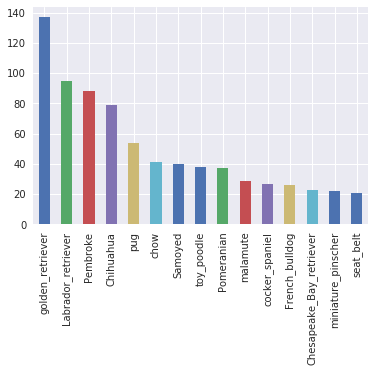

In [83]:
merged_twitter_dataset.p1.value_counts()[:15].plot(kind='bar');

- Above graph shows that most predicted images are of golden retriever which refer also it the most rated image as it is most existing dog type in the dataset

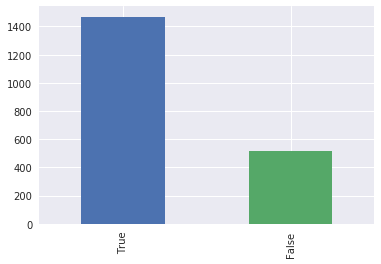

In [84]:
merged_twitter_dataset.p1_dog.value_counts()[:15].plot(kind='bar');

- Above graph shows that most predicted images are dogs